<h1><center> Walmart Stores during Black Friday </center></h1>

## Confidence Interval and CLT

## `1. Business Problem and Analyzing basic materics:`
1. Analyze the **customer purchase behavior** (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
2. The spending habits between **male and female customers**: Do women spend more on Black Friday than men?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st

In [7]:
walmart = pd.read_csv("C:/Users/Rajeshri Jogi/Desktop/PROJECTS/4. Walmart/walmart_data.csv")

### `1.1. Observation of Data:`

**`Insights:`**
1. No.of Rows: 550068 , No. of Columns: 10
2. Data Type: int64(5), object(5)
3. Most of the data is Categorical data

In [8]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
walmart.shape

(550068, 10)

In [10]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
df = walmart.copy(deep=True)

In [12]:
df.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [13]:
bins = [0,5000,10000,15000,20000,25000]
labels = ["0-5000","5001-10000","10001-15000","15001-20000","20001-25000"]
df["Purchase_bin"] = pd.cut(x=df["Purchase"],bins = bins, labels=labels)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_bin
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,5001-10000
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15001-20000
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,0-5000
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,0-5000
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,5001-10000
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,0-5000
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,0-5000
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,0-5000
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,0-5000


### `1.2. Non-Graphical Analysis:`

**`Insights:`**
1. Purchase: Mean=9263, Median=8047, Standard Deviation=5023. The max value is 23961 and mean is 9263 hence there are outliers in Purchase amount.
2. The age is categorized in 7bins, and Maximum purchases are done by customer in Age group of **26-35**.
3. There 3 cities considered in this data, and city B has the highest purchases.
4. The ratio of female to male is the data is **1:3**

In [14]:
walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [15]:
walmart.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


### `1.3. Visual Analysis`

**`Insights:`**
1. Most purchase amount is within 5000-1000 bracket.
2. Most of the population in sample is not married.
3. Maximum purchases are done by customer in Age group of **26-35 > 36-45 > 18-25**.
4. Maximum pruchases are done by city **B > C > A**.
5. Unmarried customers has more purchases compared to Married customers.
6. Female customers tend to buy **expensive products** compared to Male.
7. Product Category 6 and 7 has the biggest range of products in terms of amount.
8. Male from 51-55yrs age group buys the most expensive products.
9. **Correlation:**
```
a. Purchase is most correlated with Gender by 6%.
b. Purchase is also correlated with Occupation by 2.1%.
c. Product Category and Occupation are correlated by 2.1%.
d. Product Category and Marital Status are correlated by 2.4%.
e. Age is most correlated with Product Category by 6%
d. Age and Purchase are correlated by 1.6%
```

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

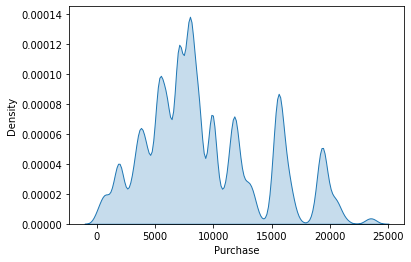

In [16]:
sns.kdeplot(data = df,x = "Purchase",shade = True)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

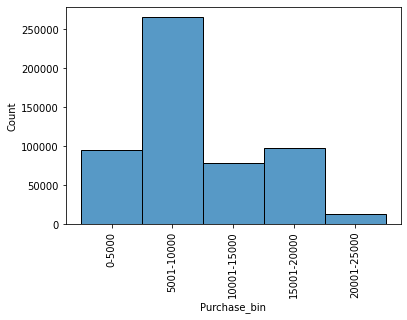

In [17]:
sns.histplot(data = df,x = "Purchase_bin")
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Gender', ylabel='count'>

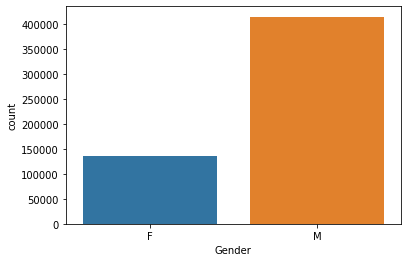

In [18]:
sns.countplot(data = df,
             x = "Gender")

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

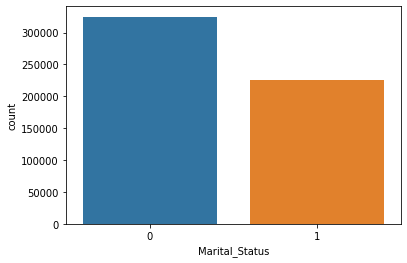

In [19]:
sns.countplot(data = df,
             x = "Marital_Status")

In [20]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [21]:
sns.countplot(df2["Age"])

NameError: name 'df2' is not defined

C:\Users\Rajeshri Jogi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

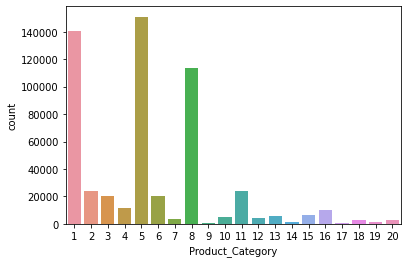

In [22]:
sns.countplot(df["Product_Category"])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

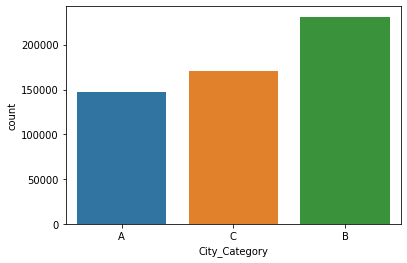

In [23]:
sns.countplot(data = df, x = "City_Category")

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

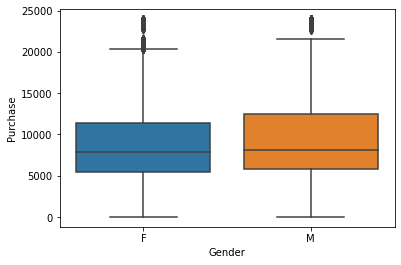

In [24]:
sns.boxplot(data = df,
           x = "Gender",
           y = "Purchase")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

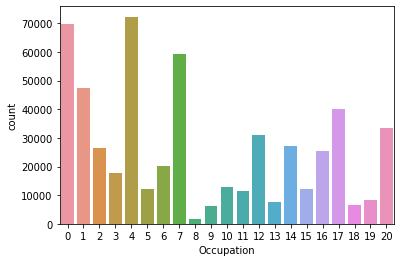

In [25]:
sns.countplot(data=df,
             x="Occupation")

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

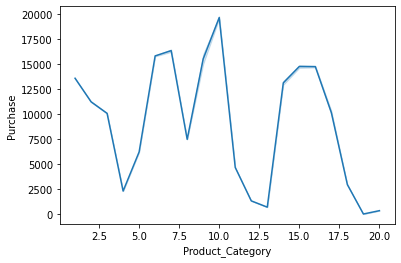

In [27]:
sns.lineplot(data=df,
               x="Product_Category",
               y = "Purchase")

In [28]:
sns.lineplot(data=df2,
               x="Occupation",
               y = "Purchase")

NameError: name 'df2' is not defined

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

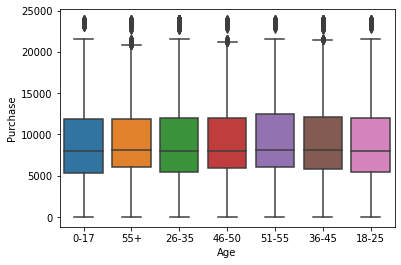

In [29]:
sns.boxplot(data = df,
           x = "Age",
           y = "Purchase")

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

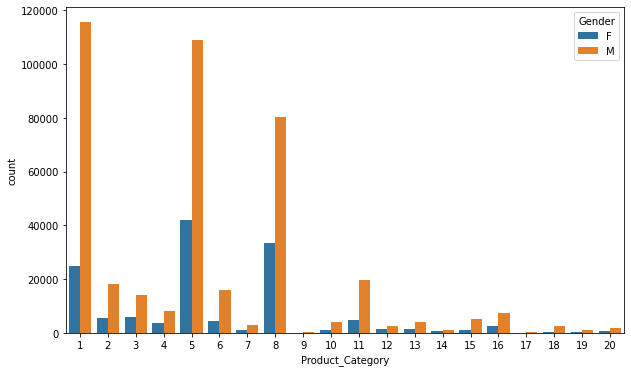

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data = df,
             x = "Product_Category",
             hue = "Gender")

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

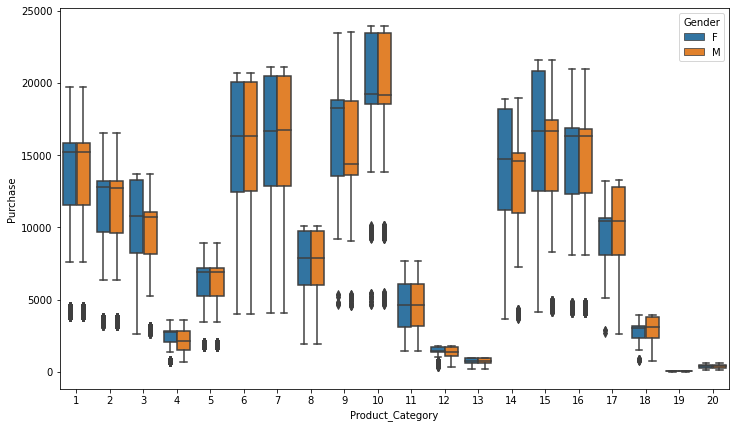

In [31]:
plt.figure(figsize=(12,7))
sns.boxplot(data = df,
             x = "Product_Category",
             y= "Purchase",
           hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

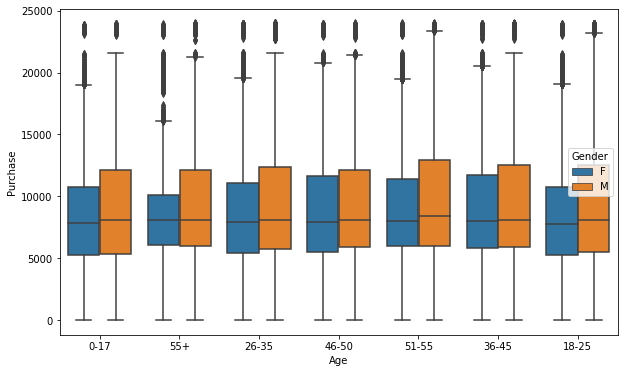

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df,
           x = "Age",
           y = "Purchase",
           hue = "Gender")

In [33]:
df2 = walmart.copy(deep=True)

In [34]:
df2['Gender'].replace(['F','M'],["0","1"],inplace=True)
df2['Gender'] = pd.to_numeric(df2["Gender"])
df2["Age"].replace(["0-17","18-25","26-35","36-45","46-50","51-55","55+"],["0","18","26","36","46","51","55"],inplace=True)
df2['Age'] = pd.to_numeric(df2["Age"])
df2["Marital_Status"] = df2["Marital_Status"].astype("string")
df2["Occupation"] = df2["Occupation"].astype("string")
df2["Product_Category"] = pd.to_numeric(df2["Product_Category"])

<AxesSubplot:>

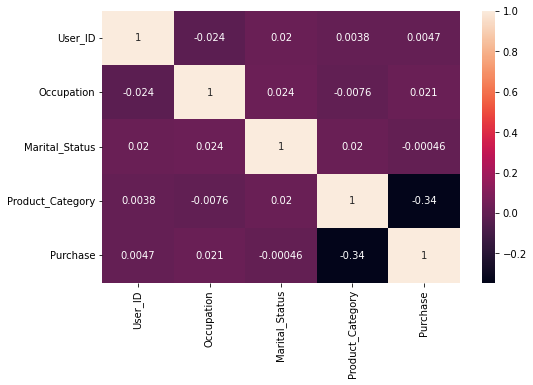

In [35]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

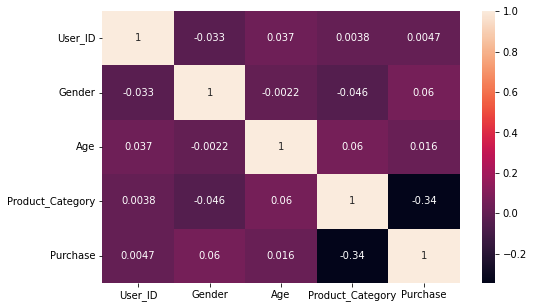

In [36]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(),annot = True)

In [37]:
pd.crosstab(df["Marital_Status"],df["Gender"],margins=True,normalize=True)

Gender,F,M,All
Marital_Status,,,
0,0.143293,0.447054,0.590347
1,0.103602,0.306051,0.409653
All,0.246895,0.753105,1.000000


## `2. Missing Value & Outlier Detection`

**`Insights:`**
1. There are no null or NaN values in the data.
2. No Duplicate values
3. Outliers in Purchase Amount
4. **number of outliers**:2677
5. **max outlier value**:23961
6. **min outlier value**:21401
7. Male outliers **>** Female outliers .
8. **Maximum Outliers are Male from 26-35yrs.**
9. 50% of the outliers are from City B category.

In [38]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [39]:
walmart.isnull().values.any()

False

In [40]:
df.loc[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_bin


In [42]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [43]:
outliers = find_outliers_IQR(df["Purchase"])
print("number of outliers:" + str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value:"+ str(outliers.min()))
df.loc[outliers].describe(include = object)

number of outliers:2677
max outlier value:23961
min outlier value:21401


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,2677,2677,2677,2677,2677
unique,722,2,7,3,5
top,P00025442,M,26-35,B,1
freq,23,2418,1440,1322,896


In [46]:
df["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

## `4. Answering Questions:`

#### **`Insights:`**
1. **Population Average:** The average purchase amount of Female is USD 8734 and Male is USD 9438.
2. Women are spending < Men on average, because the Female buys mostly from **Product Category 5,8 & 1**,which has very low range products.
3. **Female Confidence Interval:**
```
90% Purchase Confidence Interval:(8713.28, 8755.84)
95% Purchase Confidence Interval:(8709.21, 8759.92)
99% Purchase Confidence Interval:(8701.24, 8767.88)
```
4. **Male Confidence Interval:**
```
90% Purchase Confidence Interval:(9424.51, 9450.53)
95% Purchase Confidence Interval:(9422.019, 9453.03)
99% Purchase Confidence Interval:(9417.14, 9457.90)
```
5. The confidence intervals of Male and Female are not overlapping.

6. **Married Customer Confidence Interval:**
```
90% Purchase Confidence Interval:(9243.79, 9278.55)
95% Purchase Confidence Interval:(9240.46, 9281.88)
99% Purchase Confidence Interval:(9233.95, 9288.39)
```
7. **Unmarried Customer Confidence Interval:**
```
90% Purchase Confidence Interval:(9251.39, 9280.41)
95% Purchase Confidence Interval:(9248.61, 9283.19)
99% Purchase Confidence Interval:(9243.18, 9288.63)
```
8. **Age Group Below 17yrs - Confidence Interval:**
```
90% Purchase Confidence Interval:(8865.04, 9001.87)
95% Purchase Confidence Interval:(8851.94, 9014.98)
99% Purchase Confidence Interval:(8826.32, 9040.60)
```
9. **Age Group 18-25yrs - Confidence Interval:**
```
90% Purchase Confidence Interval:(9143.43, 9195.89)
95% Purchase Confidence Interval:(9138.40, 9200.91)
99% Purchase Confidence Interval:(9128.58, 9210.74)
```
10. **Age Group 26-35yrs - Confidence Interval:**
```
90% Purchase Confidence Interval:(9235.10, 9270.27)
95% Purchase Confidence Interval:(9231.73, 9273.64)
99% Purchase Confidence Interval:(9225.14, 9280.23)
```
11. **Age Group 36-45yrs - Confidence Interval:**
```
90% Purchase Confidence Interval:(9306.44, 9356.26)
95% Purchase Confidence Interval:(9301.66, 9361.03)
99% Purchase Confidence Interval:(9292.34, 9370.35)
```
12. **Age Group 46-50yrs - Confidence Interval:**
```
90% Purchase Confidence Intervals:(9170.40, 9246.84)
95% Purchase Confidence Interval:(9163.08, 9254.16)
99% Purchase Confidence Interval:(9148.77, 9268.47)
```
13. **Age Group 51-55yrs - Confidence Interval:**
```
90% Purchase Confidence Interval:(9492.16, 9577.45)
95% Purchase Confidence Interval:(9483.98, 9585.62)
99% Purchase Confidence Interval:(9468.02, 9601.59)
```
14. **Age Group Above 55yrs - Confidence Interval:**
```
90% Purchase Confidence Interval:(9280.06, 9392.49)
95% Purchase Confidence Interval:(9269.29, 9403.26)
99% Purchase Confidence Interval:(9248.24, 9424.31)
```


Female Purchase amount Mean:8734.565765155476
Female Purchase amount SD:4767.233289291458
90% Female Purchase Confidence Interval:(8713.287689504074, 8755.843840806878)
95% Female Purchase Confidence Interval:(8709.21132117373, 8759.92020913722)
99% Female Purchase Confidence Interval:(8701.24420611832, 8767.887324192632)


C:\Users\Rajeshri Jogi\AppData\Local\Temp\ipykernel_22524\3679300526.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_Female_purchase = st.t.interval(alpha=0.90, df=len(Female_data["Purchase"])-1,
C:\Users\Rajeshri Jogi\AppData\Local\Temp\ipykernel_22524\3679300526.py:24: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_Female_purchase = st.t.interval(alpha=0.95, df=len(Female_data["Purchase"])-1,
C:\Users\Rajeshri Jogi\AppData\Local\Temp\ipykernel_22524\3679300526.py:30: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_Female_purchase = st.t.interval(alpha=0.99, df=len(Female_data["Purchase"])-1,


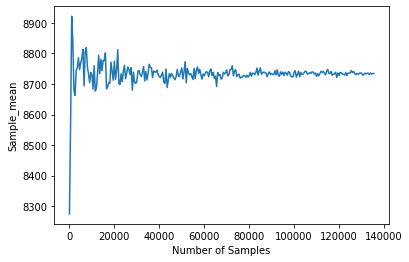

In [44]:
# Female Purchases
Female_data = df[df["Gender"]=="F"]
print("Female Purchase amount Mean:"+ str(Female_data["Purchase"].mean()))
print("Female Purchase amount SD:"+ str(Female_data["Purchase"].std()))

#Sample trend 
sample_mean_trend = []
x_values = range(100,len(Female_data),500)
for num_samples in x_values:
    sample = Female_data["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Female Purchase amount
CI_Female_purchase = st.t.interval(alpha=0.90, df=len(Female_data["Purchase"])-1,
              loc=np.mean(Female_data["Purchase"]),
              scale=st.sem(Female_data["Purchase"]))
print("90% Female Purchase Confidence Interval:" + str(CI_Female_purchase))

# 95% Confidence Interval - Female Purchase amount
CI_Female_purchase = st.t.interval(alpha=0.95, df=len(Female_data["Purchase"])-1,
              loc=np.mean(Female_data["Purchase"]),
              scale=st.sem(Female_data["Purchase"]))
print("95% Female Purchase Confidence Interval:" + str(CI_Female_purchase))

# 99% Confidence Interval - Female Purchase amount
CI_Female_purchase = st.t.interval(alpha=0.99, df=len(Female_data["Purchase"])-1,
              loc=np.mean(Female_data["Purchase"]),
              scale=st.sem(Female_data["Purchase"]))
print("99% Female Purchase Confidence Interval:" + str(CI_Female_purchase))

In [45]:
Female_data.shape

(135809, 11)

In [ ]:
# Male Purchases
Male_data = df[df["Gender"]=="M"]
print("Male Purchase amount Mean:" + str(Male_data["Purchase"].mean()))
print("Male Purchase amount SD:" + str(Male_data["Purchase"].std()))

#Sample Trend
sample_mean_trend = []
x_values = range(200,len(Male_data),500)
for num_samples in x_values:
    sample = Male_data["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Male Purchase amount
CI_Male_purchase = st.t.interval(alpha=0.90, df=len(Male_data["Purchase"])-1,
              loc=np.mean(Male_data["Purchase"]),
              scale=st.sem(Male_data["Purchase"]))
print("90% Male Purchase Confidence Interval:" + str(CI_Male_purchase))

# 95% Confidence Interval - Male Purchase amount
CI_Male_purchase = st.t.interval(alpha=0.95, df=len(Male_data["Purchase"])-1,
              loc=np.mean(Male_data["Purchase"]),
              scale=st.sem(Male_data["Purchase"]))
print("95% Male Purchase Confidence Interval:" + str(CI_Male_purchase))

# 99% Confidence Interval - Male Purchase amount
CI_Male_purchase = st.t.interval(alpha=0.99, df=len(Male_data["Purchase"])-1,
              loc=np.mean(Male_data["Purchase"]),
              scale=st.sem(Male_data["Purchase"]))
print("99% Male Purchase Confidence Interval:" + str(CI_Male_purchase))

In [ ]:
Married_data = df[df["Marital_Status"]== 1]
print("Married Customer Purchase amount Mean:"+ str(Married_data["Purchase"].mean()))
print("Married Customer Purchase amount SD:"+ str(Married_data["Purchase"].std()))

#sample Trend
sample_mean_trend = []
x_values = range(100,len(Married_data),500)
for num_samples in x_values:
    sample = Married_data["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Married Customer Purchase amount
CI_married_purchase = st.t.interval(alpha=0.90, df=len(Married_data["Purchase"])-1,
              loc=np.mean(Married_data["Purchase"]),
              scale=st.sem(Married_data["Purchase"]))
print("90% Married Customer Purchase Confidence Interval:" + str(CI_married_purchase))

# 95% Confidence Interval - Married Customer Purchase amount
CI_married_purchase = st.t.interval(alpha=0.95, df=len(Married_data["Purchase"])-1,
              loc=np.mean(Married_data["Purchase"]),
              scale=st.sem(Married_data["Purchase"]))
print("95% Married Customer Purchase Confidence Interval:" + str(CI_married_purchase))

# 99% Confidence Interval - Married Customer Purchase amount
CI_married_purchase = st.t.interval(alpha=0.99, df=len(Married_data["Purchase"])-1,
              loc=np.mean(Married_data["Purchase"]),
              scale=st.sem(Married_data["Purchase"]))
print("99% Married Customer Purchase Confidence Interval:" + str(CI_married_purchase))

In [ ]:
Unmarried_data = df[df["Marital_Status"]== 0]
print("Unmarried Customer Purchase amount Mean:"+ str(Unmarried_data["Purchase"].mean()))
print("Unmarried Customer Purchase amount SD:"+ str(Unmarried_data["Purchase"].std()))

#Sample Trend
sample_mean_trend = []
x_values = range(100,len(Unmarried_data),500)
for num_samples in x_values:
    sample = Unmarried_data["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Unmarried Customer Purchase amount
CI_unmarried_purchase = st.t.interval(alpha=0.90, df=len(Unmarried_data["Purchase"])-1,
              loc=np.mean(Unmarried_data["Purchase"]),
              scale=st.sem(Unmarried_data["Purchase"]))
print("90% Unmarried Customer Purchase Confidence Interval:" + str(CI_unmarried_purchase))

# 95% Confidence Interval - Unmarried Customer Purchase amount
CI_unmarried_purchase = st.t.interval(alpha=0.95, df=len(Unmarried_data["Purchase"])-1,
              loc=np.mean(Unmarried_data["Purchase"]),
              scale=st.sem(Unmarried_data["Purchase"]))
print("95% Unmarried Customer Purchase Confidence Interval:" + str(CI_unmarried_purchase))

# 99% Confidence Interval - Unmarried Customer Purchase amount
CI_unmarried_purchase = st.t.interval(alpha=0.99, df=len(Unmarried_data["Purchase"])-1,
              loc=np.mean(Unmarried_data["Purchase"]),
              scale=st.sem(Unmarried_data["Purchase"]))
print("99% Unmarried Customer Purchase Confidence Interval:" + str(CI_unmarried_purchase))

In [ ]:
# Age Group Below 17yrs
Below_17 = df[df["Age"]=="0-17"]
print("Customer's Age below 17yrs Purchase amount Mean:"+ str(Below_17["Purchase"].mean()))
print("Customer's Age below 17yrs Purchase amount SD:"+ str(Below_17["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Below_17),200)
for num_samples in x_values:
    sample = Below_17["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age below 17yrs
Below_17_purchase = st.t.interval(alpha=0.90, df=len(Below_17["Purchase"])-1,
              loc=np.mean(Below_17["Purchase"]),
              scale=st.sem(Below_17["Purchase"]))
print("90% Confidence Interval of Customer's Age below 17yrs:" + str(Below_17_purchase))

# 95% Confidence Interval - Customer's Age below 17yrs
Below_17_purchase = st.t.interval(alpha=0.95, df=len(Below_17["Purchase"])-1,
              loc=np.mean(Below_17["Purchase"]),
              scale=st.sem(Below_17["Purchase"]))
print("95% Confidence Interval of Customer's Age below 17yrs:" + str(Below_17_purchase))

# 99% Confidence Interval - Customer's Age below 17yrs
Below_17_purchase = st.t.interval(alpha=0.99, df=len(Below_17["Purchase"])-1,
              loc=np.mean(Below_17["Purchase"]),
              scale=st.sem(Below_17["Purchase"]))
print("99% Confidence Interval of Customer's Age below 17yrs:" + str(Below_17_purchase))

In [ ]:
# Age Group 18-25
Between_18_25 = df[df["Age"]=="18-25"]
print("Customer's Age between 18-25yrs Purchase amount Mean:"+ str(Between_18_25["Purchase"].mean()))
print("Customer's Age between 18-25yrs Purchase amount SD:"+ str(Between_18_25["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Between_18_25),200)
for num_samples in x_values:
    sample = Between_18_25["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age between 18-25yrs
Between_18_25_purchase = st.t.interval(alpha=0.90, df=len(Between_18_25["Purchase"])-1,
              loc=np.mean(Between_18_25["Purchase"]),
              scale=st.sem(Between_18_25["Purchase"]))
print("90% Confidence Interval of Customer's Age between 18-25yrs:" + str(Between_18_25_purchase))

# 95% Confidence Interval - Customer's Age between 18-25yrs
Between_18_25_purchase = st.t.interval(alpha=0.95, df=len(Between_18_25["Purchase"])-1,
              loc=np.mean(Between_18_25["Purchase"]),
              scale=st.sem(Between_18_25["Purchase"]))
print("95% Confidence Interval of Customer's Age between 18-25yrs:" + str(Between_18_25_purchase))

# 99% Confidence Interval - Customer's Age between 18-25yrs
Between_18_25_purchase = st.t.interval(alpha=0.99, df=len(Between_18_25["Purchase"])-1,
              loc=np.mean(Between_18_25["Purchase"]),
              scale=st.sem(Between_18_25["Purchase"]))
print("99% Confidence Interval of Customer's Age between 18-25yrs:" + str(Between_18_25_purchase))

In [ ]:
# Age Group 26-35
Between_26_35 = df[df["Age"]=="26-35"]
print("Customer's Age between 26-35yrs Purchase amount Mean:"+ str(Between_26_35["Purchase"].mean()))
print("Customer's Age between 26-35yrs Purchase amount SD:"+ str(Between_26_35["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Between_26_35),200)
for num_samples in x_values:
    sample = Between_26_35["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age between 26-35yrs
Between_26_35_purchase = st.t.interval(alpha=0.90, df=len(Between_26_35["Purchase"])-1,
              loc=np.mean(Between_26_35["Purchase"]),
              scale=st.sem(Between_26_35["Purchase"]))
print("90% Confidence Interval of Customer's Age between 26-35yrs:" + str(Between_26_35_purchase))

# 95% Confidence Interval - Customer's Age between 26-35yrs
Between_26_35_purchase = st.t.interval(alpha=0.95, df=len(Between_26_35["Purchase"])-1,
              loc=np.mean(Between_26_35["Purchase"]),
              scale=st.sem(Between_26_35["Purchase"]))
print("95% Confidence Interval of Customer's Age between 26-35yrs:" + str(Between_26_35_purchase))

# 99% Confidence Interval - Customer's Age between 26-35yrs
Between_26_35_purchase = st.t.interval(alpha=0.99, df=len(Between_26_35["Purchase"])-1,
              loc=np.mean(Between_26_35["Purchase"]),
              scale=st.sem(Between_26_35["Purchase"]))
print("99% Confidence Interval of Customer's Age between 26-35yrs:" + str(Between_26_35_purchase))


In [ ]:
# Age Group 36-45
Between_36_45 = df[df["Age"]=="36-45"]
print("Customer's Age between 36-45yrs Purchase amount Mean:"+ str(Between_36_45["Purchase"].mean()))
print("Customer's Age between 36-45yrs Purchase amount SD:"+ str(Between_36_45["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Between_36_45),200)
for num_samples in x_values:
    sample = Between_36_45["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age between 36-45yrs
Between_36_45_purchase = st.t.interval(alpha=0.90, df=len(Between_36_45["Purchase"])-1,
              loc=np.mean(Between_36_45["Purchase"]),
              scale=st.sem(Between_36_45["Purchase"]))
print("90% Confidence Interval of Customer's Age between 36-45yrs:" + str(Between_36_45_purchase))

# 95% Confidence Interval - Customer's Age between 36-45yrs
Between_36_45_purchase = st.t.interval(alpha=0.95, df=len(Between_36_45["Purchase"])-1,
              loc=np.mean(Between_36_45["Purchase"]),
              scale=st.sem(Between_36_45["Purchase"]))
print("95% Confidence Interval of Customer's Age between 36-45yrs:" + str(Between_36_45_purchase))

# 99% Confidence Interval - Customer's Age between 36-45yrs
Between_36_45_purchase = st.t.interval(alpha=0.99, df=len(Between_36_45["Purchase"])-1,
              loc=np.mean(Between_36_45["Purchase"]),
              scale=st.sem(Between_36_45["Purchase"]))
print("99% Confidence Interval of Customer's Age between 36-45yrs:" + str(Between_36_45_purchase))

In [ ]:
# Age Group 46-50
Between_46_50 = df[df["Age"]=="46-50"]
print("Customer's Age between 46-50yrs Purchase amount Mean:"+ str(Between_46_50["Purchase"].mean()))
print("Customer's Age between 46-50yrs Purchase amount SD:"+ str(Between_46_50["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Between_46_50),200)
for num_samples in x_values:
    sample = Between_46_50["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age between 46-50yrs
Between_46_50_purchase = st.t.interval(alpha=0.90, df=len(Between_46_50["Purchase"])-1,
              loc=np.mean(Between_46_50["Purchase"]),
              scale=st.sem(Between_46_50["Purchase"]))
print("90% Confidence Interval of Customer's Age between 46-50yrs:" + str(Between_46_50_purchase))

# 95% Confidence Interval - Customer's Age between 46-50yrs
Between_46_50_purchase = st.t.interval(alpha=0.95, df=len(Between_46_50["Purchase"])-1,
              loc=np.mean(Between_46_50["Purchase"]),
              scale=st.sem(Between_46_50["Purchase"]))
print("95% Confidence Interval of Customer's Age between 46-50yrs:" + str(Between_46_50_purchase))

# 99% Confidence Interval - Customer's Age between 46-50yrs
Between_46_50_purchase = st.t.interval(alpha=0.99, df=len(Between_46_50["Purchase"])-1,
              loc=np.mean(Between_46_50["Purchase"]),
              scale=st.sem(Between_46_50["Purchase"]))
print("99% Confidence Interval of Customer's Age between 46-50yrs:" + str(Between_46_50_purchase))

In [ ]:
# Age Group 51-55
Between_51_55 = df[df["Age"]=="51-55"]
print("Customer's Age between 51-55yrs Purchase amount Mean:"+ str(Between_51_55["Purchase"].mean()))
print("Customer's Age between 51-55yrs Purchase amount SD:"+ str(Between_51_55["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Between_51_55),200)
for num_samples in x_values:
    sample = Between_51_55["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age between 51-55yrs
Between_51_55_purchase = st.t.interval(alpha=0.90, df=len(Between_51_55["Purchase"])-1,
              loc=np.mean(Between_51_55["Purchase"]),
              scale=st.sem(Between_51_55["Purchase"]))
print("90% Confidence Interval of Customer's Age between 51-55yrs:" + str(Between_51_55_purchase))

# 95% Confidence Interval - Customer's Age between 51-55yrs
Between_51_55_purchase = st.t.interval(alpha=0.95, df=len(Between_51_55["Purchase"])-1,
              loc=np.mean(Between_51_55["Purchase"]),
              scale=st.sem(Between_51_55["Purchase"]))
print("95% Confidence Interval of Customer's Age between 51-55yrs:" + str(Between_51_55_purchase))

# 99% Confidence Interval - Customer's Age between 51-55yrs
Between_51_55_purchase = st.t.interval(alpha=0.99, df=len(Between_51_55["Purchase"])-1,
              loc=np.mean(Between_51_55["Purchase"]),
              scale=st.sem(Between_51_55["Purchase"]))
print("99% Confidence Interval of Customer's Age between 51-55yrs:" + str(Between_51_55_purchase))

In [ ]:
# Age Group 55 and Above
Above_55 = df[df["Age"]=="55+"]
print("Customer's Age above 55yrs Purchase amount Mean:"+ str(Above_55["Purchase"].mean()))
print("Customer's Age above 55yrs Purchase amount SD:"+ str(Above_55["Purchase"].std()))

# Sample Trend
sample_mean_trend = []
x_values = range(50,len(Above_55),200)
for num_samples in x_values:
    sample = Above_55["Purchase"].sample(num_samples)
    samle_mean = np.mean(sample)
    sample_mean_trend.append(samle_mean)
plt.plot(x_values,sample_mean_trend)
plt.xlabel("Number of Samples")
plt.ylabel("Sample_mean")

# 90% Confidence Interval - Customer's Age above 55yrs
Above_55_purchase = st.t.interval(alpha=0.90, df=len(Above_55["Purchase"])-1,
              loc=np.mean(Above_55["Purchase"]),
              scale=st.sem(Above_55["Purchase"]))
print("90% Confidence Interval of Customer's Age above 55yrs:" + str(Above_55_purchase))

# 95% Confidence Interval - Customer's Age above 55yrs
Above_55_purchase = st.t.interval(alpha=0.95, df=len(Above_55["Purchase"])-1,
              loc=np.mean(Above_55["Purchase"]),
              scale=st.sem(Above_55["Purchase"]))
print("95% Confidence Interval of Customer's Age above 55yrs:" + str(Above_55_purchase))

# 99% Confidence Interval - Customer's Age above 55yrs
Above_55_purchase = st.t.interval(alpha=0.99, df=len(Above_55["Purchase"])-1,
              loc=np.mean(Above_55["Purchase"]),
              scale=st.sem(Above_55["Purchase"]))
print("99% Confidence Interval of Customer's Age above 55yrs:" + str(Above_55_purchase))

# `Recommendations:`
1. **Age:**
```
a. 78% of the Purchases on Black Friday are done by the age group 26-35 > 36-45 > 18-25 yrs, hence focus/target customers should be from this bracket and accordingly make changes in the product.
b. On Average age group, 51-55yrs spend most per bill > 36-45yrs > Above 55yrs. Offers and Campaigns can be run to attract these customers to buy more. Offer like on purchase of particular amount you get a discount or get a voucher of a certain amount for future purchases.
```
2. **Occupation:**
```
a. The average purchase is highest by the customers from Occupation Category 15,12 and 17.
b. The customers from this occupation category have a higher budget, hence products can be designed as per the occupational relatability.
```
3. **Product Category:**
```
a. Try selling more products from categories 6,7,9,10,15 and 16.
b. Make some variance in marketing/product for products from categories 19,13,20,12,4 to attract more customers. For eg: some bulk offers, extra savings, etc.
```
4. **Gender:**
```
a. Men tend to have a higher average purchase per bill compared to women. One of many reasons could be women are buying more from 5,8 and 1. These products fall cheaper compared to other categories.
b. Champaign and marketing can be done on products from categories 6,7,9,10,15 to attract women. 
```
5. **Purchases are the most correlated with Gender, and Male purchases are more compared to females.**
```
```
6. **Confidence Interval:**
```
a. As 90% of Male customers' purchase bills are between USD 9424 - 9450, an offer can be created at USD 9999. This will increase the purchase amount by USD 500 and help retain the customers by offering comeback vouchers.

Similarly, 90% of Female customers’ purchase bills are between USD 8713 - 8755, offers/vouchers/discount can be run with the help of this interval.

Married and Unmarried customers' confidence interval overlaps, hence customers’ marital status will not make a difference.
```

7. As per the above, the target customers have been pictured out. So keeping in mind the target some necessary changes in product, marketing, and pricing will help in increasing the purchases on **Black Friday.**

